# Edelstein Klassifikation

## Projekt im Rahmen des Advanced Data Science Moduls 2021

### Kevin Schenk, Peter Felder, Manuel Huggenberger

#### Im Rahmen dieses Projektes möchten wir anhand eines selbst zusammengestellten Datensatzes ein Modell trainieren, dass anhand von Bilder von geschliffenen Edelsteinen diese klassifiziert. Das Projekt beinhaltet das Sammeln der Daten, das Aufbereiten der Daten und das anschliessende erstellen eines Modelles.

### imortieren der benötigten Funktionen

In [1]:
from bs4 import BeautifulSoup as bs
from bs4 import SoupStrainer
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
import requests
import os
import time

### Setup der globalen Einstellungen

In [2]:
SAVE_LOCATION = 'Dataset'
path = os.getcwd()
spath = path
#driver = webdriver.Chrome('chromedriver')

### Erstellen des Ordners für den Datensatz (wenn noch nicht vorhanden)

In [ ]:
if not os.path.exists(SAVE_LOCATION):
    os.mkdir(SAVE_LOCATION)

### To Do: Unterschied Statisch/Dynamisch dokumentiere!!!!!

## Datensatz erstellen

#### Durch Webscraping ausgewählter Internetseiten, erstellen wir einen Datensatz zum trainieren unseres Modelles.

#### Wir beginnen den Aufbau des Datensatzes mit der Seite [www.minerals.net](https://www.minerals.net/).
#### Hierfür parsen wir die Edelstein Übersichtsseite und extrahieren anschliessend sämtliche weiterleitende Hyperlinks und die Namen der präsentierten Edelsteine.
#### Durch Inspektion der Internetseite haben wir den relevanten Teil eruierten und schränken diesen mittels SoupStrainer ein, um direkt mit diesen Daten weiterzuarbeiten. 

In [ ]:
url = 'https://www.minerals.net/GemStoneMain.aspx'
html = requests.get(url).text
gemstones = SoupStrainer('table', {'id':'ctl00_ContentPlaceHolder1_DataList1'})
soup = bs(html,'html.parser',parse_only=gemstones)

In [ ]:
links = []
for href in soup.findAll('a'):
    if 'href' in href.attrs:
        links.append(href.attrs['href'])

In [ ]:
folder = []
for href in soup.findAll('a'):
    if 'href' in href.attrs:
        folder.append(href.text)

#### Aufgrund der Formatierung der Seite müssen wir auf Duplikate und leere Einträge in unsere Liste aufpassen.
#### Ebenfalls sollen alle Apostrophe gelöscht werden.

In [ ]:
links = list(dict.fromkeys(links))
folder = [x.replace('\'', '') for x in folder if x != '\'']
folder = list(filter(None,folder))

#### Damit wir im nächsten Schritt die Bilder herunterladen können, bereiten wir im bereits erstellten Ordner Dataset die Ordner-Struktur vor.
#### Für jede Edelstein Art wird ein eigener Ordner erstellt und anhand der gescrapten Namen benannt.

In [ ]:
path = spath + '\Dataset'
os.chdir(path)

In [ ]:
for gem in folder:
    if not os.path.exists(gem):
        os.mkdir(gem)

## Herunterladen der Bilder

#### Mittels Analyse des oberen Soup grenzen wir erneut unsere Suche ein und und erstellen aus diesen Daten eine Liste aller Bilder URLs.
#### In einem zweiten Schritt laden wir diese herunter und benennen diese nach gewünschtem Schema.
#### Während des Downloads achten wir jeweils darauf, die Bilder im korrekten Subordner abzuspeichern.

In [ ]:
counter = 1

for link, gem in zip(links,folder):
    site = 'https://www.minerals.net/' + link
    driver.get(site)
    images = SoupStrainer('table', {'id':'ctl00_ContentPlaceHolder1_DataList1'})
    soup = bs(driver.page_source,'html.parser',parse_only=images)
    img_tags = soup.findAll('img')
    urls = ['https://www.minerals.net/' + img['src'] for img in img_tags]
    
    path = os.getcwd() + '\\' + gem
    os.chdir(path)
    
    for url in urls:
        filename = gem + '_' + str(counter)+ '.jpeg'
        counter += 1
        with open(filename, 'wb') as f:
            response = requests.get(url, stream=True)
            f.write(response.content)
            
    
    os.chdir('..')
    counter = 1
    
path = spath
os.chdir(path)

#### To do: Besser Dokumentation und Beschrieb wie der Driver/User Agent angewendet wird
#### Analoges Vorgehen für die Seite [www.rasavgems.com](https://www.rasavgems.com).

In [ ]:
url = 'https://www.rasavgems.com/Choose-gemstone.html'
html = requests.get(url).text
gemstones = SoupStrainer('table', {'id':'ContentPlaceHolder1_Itemlist'})
soup = bs(html,'html.parser',parse_only=gemstones)

In [ ]:
links = []
for href in soup.findAll('a'):
    if 'href' in href.attrs:
        links.append(href.attrs['href'])

links = list(dict.fromkeys(links))
        
folder = []
for href in soup.findAll('a'):
    if 'href' in href.attrs:
        folder.append(href.text)
        
folder = [x.replace('\n', '') for x in folder if x != '\n']
folder = list(filter(None,folder))

In [ ]:
path = spath + '\Dataset'
os.chdir(path)

for gem in folder:
    if not os.path.exists(gem):
        os.mkdir(gem)

In [ ]:
counter = 1

for link, gem in zip(links,folder):
    site = 'https://www.rasavgems.com/' + link
    driver.get(site)
    wait = WebDriverWait(driver,15)
    try:
        element = wait.until(
        EC.presence_of_element_located((By.ID, "Product_List")))
        imgs_form = driver.find_element_by_id('Product_List')
    finally:
        html_gems = driver.page_source
    soup = bs(html_gems,'lxml')
    images = soup.find_all('div', {'class','product-one'})
    
    path = os.getcwd() + '\\' + gem
    os.chdir(path)
    
    for data in images:
        for link in data.find_all('img'):
            url = link.get('src').replace('../','')
            filename = gem + '_0' + str(counter)+ '.jpeg'
            counter += 1
            with open(filename, 'wb') as f:
                response = requests.get('https://www.rasavgems.com/' + url)
                f.write(response.content)

    
    os.chdir('..')
    counter = 1
    
path = spath
os.chdir(path)

#### Analoges Vorgehen für die Seite [www.gempundit.com/](https://www.gempundit.com/).

In [ ]:
headers = {"Host":"20min.ch",
"Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8",
"Accept-Encoding":"gzip,deflate,br",
"Cookie": "cookieconsent=true",
          }

url = 'https://www.gempundit.com/gemstones'
driver.get(url)
time.sleep(5)
soup = bs(driver.page_source,'lxml')
images = soup.find_all('ul', {'class','stonesCategoryProduct'})

In [ ]:
links = []
for data in images:
    for link in data.find_all('a'):
        url = link.get('href')
        links.append(url)

folder = []
for data in images:
    for link in data.find_all('img'):
        title = link.get('title')
        folder.append(title)
folder = [x.replace('/', '') for x in folder if x != '/']

In [ ]:
path = spath + '\Dataset'
os.chdir(path)

for gem in folder:
    if not os.path.exists(gem):
        os.mkdir(gem)

In [ ]:
counter = 1
shand = "hand"
scertified = "certified"
sCertified = "Certified"


for link, gem in zip(links,folder):
    site = link
    driver.get(site)
    soup = bs(driver.page_source,'lxml')
    images = soup.find_all('div', {'class','category-products custom-products'})
    
    path = os.getcwd() + '\\' + gem
    os.chdir(path)
    
    for data in images:
        for link in data.find_all('img'):
            url = link.get('data-src')
            if url != None and shand not in url and scertified not in url and sCertified not in url: 
                filename = gem + '_00' + str(counter)+ '.jpeg'
                counter += 1
                with open(filename, 'wb') as f:
                    response = requests.get(url)
                    f.write(response.content)

    
    os.chdir('..')
    counter = 1
    
path = spath
os.chdir(path)

In [ ]:
driver.quit()

## To do: mr händ vo hand züg gmacht, alles beschrieben!

### Umbenennen der Dateien

In [36]:
dpath = spath
print(dpath)

C:\Users\kevin\Documents\GitHub\ADS2021Edelsteine


In [ ]:
dataset = os.scandir(dpath)

for entry in dataset:
    #nur Ordner sollen aufgelistet werden
    if(entry.is_dir()):
        #dpath mit dem Ordnernamen ergänzen
        f_path= os.path.join(dpath, entry.name)
        #Dateien sollen klein geschrieben sein
        lowercasename = entry.name.lower()
        files = os.listdir(f_path)
        
        iterator = 0
        for name in files:
            file, file_extension = os.path.splitext(name)
            dst = "{}_{}{}".format(lowercasename, iterator, file_extension.lower())
            
            if len(files) != 0:
                os.rename(os.path.join(f_path,name), os.path.join(f_path,dst)) 
            iterator += 1        

## Split Folders

### importieren den benötigten Funktionen

In [5]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
import splitfolders
import cv2
import os

### Datensatz wird aufgeteilt in Test und Train Daten und so abgespeichtert

In [ ]:
splitfolders.ratio("Dataset", output="dataset_final", seed=1337, ratio=(.8,.2))

## Check Data

### Erstellung Arry für Namen der Edelsteine (names) und Zähler (counter)

In [6]:
names, counter = [], []

#Datensatz durchlaufen und files in Array schreiben
for root, dirs, files in os.walk('dataset_final'):
    name = os.path.basename(root)
    
    if len(files) > 0:
        counter.append(len(files))
        if name not in names:
            names.append(name)

### Ausgabe Übersicht über Anzahl der Trainings- und Testdaten

88 Edelsteinsorten mit insgesamt 8323 Bildern


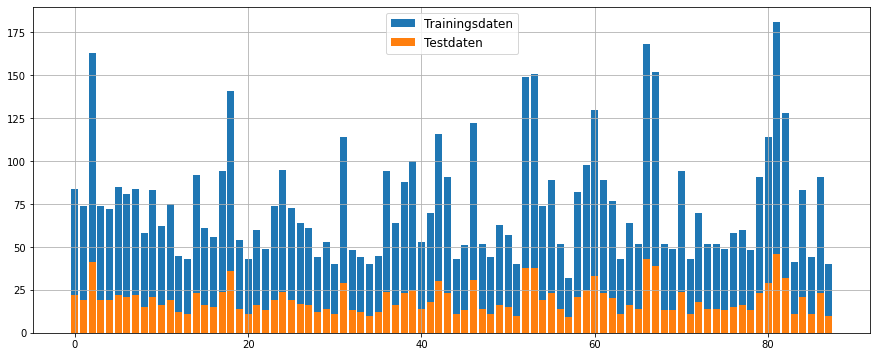

In [7]:
count = len(names)
print('{} Edelsteinsorten mit insgesamt {} Bildern'.format(len(names), sum(counter)))

f, ax = plt.subplots(figsize=(15,6))
if(counter[0])<47:
    plt.bar(range(count), counter[count:], label = 'Trainingsdaten')
    plt.bar(range(count), counter[0:count], label = 'Testdaten')
else:
    plt.bar(range(count), counter[0:count], label = 'Trainingsdaten')
    plt.bar(range(count), counter[count:], label = 'Testdaten')
ax.grid()
ax.legend(fontsize = 12);

## To do: Anfang Verarbeitung beschreiben

### Wir vergrössern die Bilder um 150% damit wir in einem weiteren Schritt die Bilder besser zuschneiden werden. Ebenfalls werden alle Bilder in den RGB Raum projiziert.
### Die Bilder werden in einen Array geschrieben (images)

In [8]:
#Erstellung Arrays
images, labels = [], []

#Variabeln für Bildbreite / Bildhöhe definieren
img_w, img_h = 220, 220

#Verzeichnis durchlaufen und Daten in Array speichern
for root, dirs, files in os.walk('dataset_final/train/'):
    tmp = os.path.basename(root)
    for file in files:
        labels.append(tmp)
        try:
            # Bilder auslesen
            image = cv2.imread(root+'/'+file)
            #Anpassung Bildgrösse
            image = cv2.resize(image,(int(img_w*1.5), int(img_h*1.5)))
            #Farbschema anpassen
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            images.append(image)
        except Exception as e:
            print(e,file)
            
images = np.array(images)

### Die Labels mit den Edelsteinnamen werden als Nummer in eimen Array abgespeichert.

In [9]:
for i, n in enumerate(labels):
    for j, k in enumerate(names):
        if n == k:
            labels[i] = j
labels = np.array(labels)

### Labels ausgeben zur Kontrolle ob die Grössen gleich sind

In [10]:
print(labels.shape)
print(images.shape)

(6618,)
(6618, 330, 330, 3)


### Anzeigen von Bildern als Vergleich (vorher)

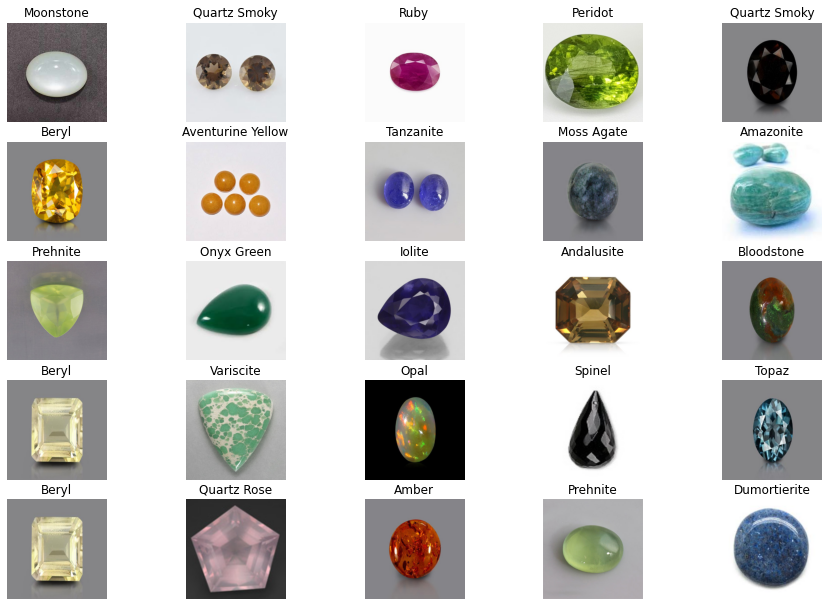

In [11]:
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,2,2)
for i in range(0,5):
    for j in range(0,5):
        rnd = randint(0,len(images))
        cl = labels[rnd]
        ax[i,j].imshow(images[rnd])
        ax[i,j].set_title(names[cl])
        ax[i,j].axis('off')

### Mit Hilfe der Canny Funktion werden die Bilder angepasst. Es wird geprüft, wo das Bild keinen Inhalt hat und anhand davon wird das Bild zugeschnitten.

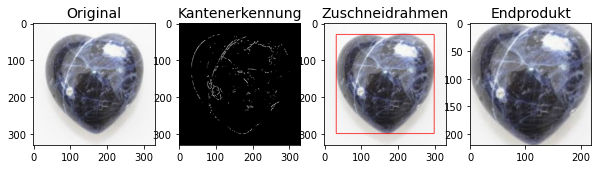

In [12]:
img = images[randint(0,len(images))]
crop = img.copy()
edges = cv2.Canny(img, img_w, img_h)

#Wir checken ob das Bild komplett Schwarz ist oder nicht. Wenn ob mehr als 11 "Pixel"/Nonzero-Einträge in der Matrix gefunden sind => Kante wurde erkannt
if(np.count_nonzero(edges)>11):
    pts = np.argwhere(edges>0)
    y1,x1 = pts.min(axis=0)
    y2,x2 = pts.max(axis=0)

    end = img[y1:y2, x1:x2]  

    edge_size = 1        
    
    #Zur Veranschaulichung heben wir den Zuschneidrahmen hervor
    crop[y1-edge_size:y1+edge_size, x1:x2] = [255, 0, 0]
    crop[y2-edge_size:y2+edge_size, x1:x2] = [255, 0, 0]
    crop[y1:y2, x1-edge_size:x1+edge_size] = [255, 0, 0]
    crop[y1:y2, x2-edge_size:x2+edge_size] = [255, 0, 0]

    #Anpassung des zugeschnittenen Bildes an die Standardgrösse
    end = cv2.resize(end,(img_w, img_h))

else:
    #Bei Bilder wo keine Kante erkannt wurde, wird lediglich die Grösse angepasst
    end = cv2.resize(img,(img_w, img_h))

# Ausgabe der Bilder
fig, ax = plt.subplots(1,4,figsize=(10, 10))
ax[0].imshow(img)
ax[0].set_title('Original', fontsize=14)
ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Kantenerkennung', fontsize=14)
ax[2].imshow(crop)
ax[2].set_title('Zuschneidrahmen', fontsize=14)       
ax[3].imshow(end)
ax[3].set_title('Endprodukt', fontsize=14)  

plt.show()

###  Die Bilder werden anhand der Funktion oben zugeschnitten, damit unnötige Rahmen entfernt werden

In [13]:
cropages = np.ndarray(shape=(len(images), img_w, img_h, 3), dtype=int)

counter = 0
for img in images: 
    try:
        edges = cv2.Canny(img, img_w, img_h)            
        #Wenn edges (11 oder mehr nonzeroes) gefunden wurden, crop image anhand min/max
        if(np.count_nonzero(edges)>11):           
            points = np.argwhere(edges>0)
            ymin,xmin = points.min(axis=0)
            ymax,xmax = points.max(axis=0)
            
            #Bild cropen und anschliessend auf Standardgrösse anpassen
            new_img = img[ymin:ymax, xmin:xmax]
            new_img = cv2.resize(new_img,(img_w, img_h))
        
        #Wenn keine edges gefunden wurden, Bild direkt an Standardgrösse anpassen
        else:
            new_img = cv2.resize(img,(img_w, img_h))
    
    #Im Falle eines Fehlers, Bild direkt an Standardgrösse anpassen
    except Exception as e:
        print(e)
        new_img = cv2.resize(img,(img_w, img_h))
    
    #cropages array mit neuen Bildern befüllen
    cropages[counter] = new_img
    counter += 1

### Array ausgeben zur Kontrolle ob die Grössen gleich sind

In [14]:
print(cropages.shape)

(6618, 220, 220, 3)


### Ausgabe der Bilder als Vergleich zur ersten Ausgabe

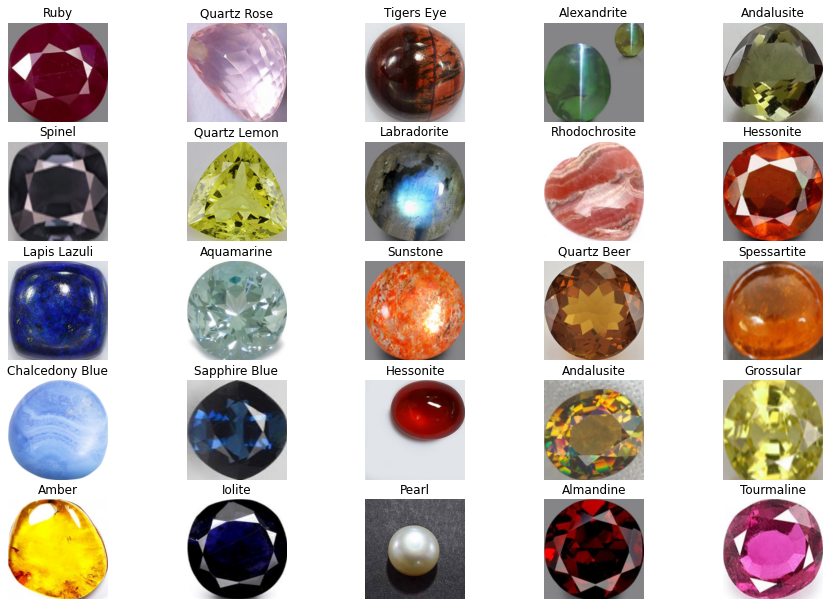

In [15]:
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,2,2)
for i in range(0,5):
    for j in range(0,5):
        rnd = randint(0,len(cropages))
        cl = labels[rnd]
        ax[i,j].imshow(cropages[rnd])
        ax[i,j].set_title(names[cl])
        ax[i,j].axis('off')

## Aufteilen des Datensatzes in Training und Validation Set

In [16]:
from sklearn.model_selection import train_test_split
#Definition Testdaten und Validierungsdaten
X_train, X_val, y_train, y_val = train_test_split(cropages, labels, shuffle = True, test_size = 0.2, random_state = 42)

In [17]:
#Wichtig: tensorflow-gpu mittels Befehl conda install tensorflow-gpu=2.3 tensorflow=2.3=mkl_py38h1fcfbd6_0 (siehe https://github.com/ContinuumIO/anaconda-issues/issues/12194#issuecomment-751700156)
#installieren. Sonst werden nicht alle nötigen Dependencies mit installiert.
from tensorflow.python.client import device_lib
devices = device_lib.list_local_devices()
print(devices)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 752549676195693893
]


### Keras importieren

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers

## Hyperparamter setzen

### TO do: Besser beschreiben


In [19]:
filters = 32                                 #Anzahl der benutzen Filter
kernel_size = 3                              #Kernelgrösse ()
max_pool = 2                                 #asdf

In [20]:
epoch = 2                                    # Wie oft der ganze Datensatz von Model gesehen wird
batch_size = 32                              # Anzahl samples welche pro Batch benutzt werden
iterations = len(X_train) // batch_size      # Anzahl Iterationen pro Epoche
validations = len(X_val) // batch_size       # Anzahl Validierungen pro Epoche

## To do: Beschreibung wie wir auf das Model gekommen sind
### Wir benutzen ein sequentielles Modell, da wir jeweils 1 Input und 1 Output haben.
### Als Activation function haben wir die lineare relu Funktion gewählt. Damit haben wir die besten Ergebnisse erzielt. relu brint Speed und Stabilität.



In [21]:
model = Sequential()

# erster layer
model.add(Conv2D(batch_size, (kernel_size, kernel_size), activation='relu', padding='same', input_shape=(img_w, img_h, 3)))
model.add(MaxPooling2D((max_pool, max_pool)))

# zweiter layer
model.add(Conv2D(2*batch_size, (kernel_size, kernel_size), activation='relu', padding='same'))
model.add(MaxPooling2D((max_pool, max_pool))) 

# dritter layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same'))
model.add(MaxPooling2D((max_pool, max_pool))) 

# vierter layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same'))
model.add(AveragePooling2D(pool_size= (2, 2), strides= (2, 2))) 

# fünfter layer
model.add(Conv2D(4*batch_size, (kernel_size, kernel_size), activation='relu', padding='same'))
model.add(MaxPooling2D((max_pool, max_pool))) 

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(16*batch_size, activation='relu'))
model.add(Dense(88, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 55, 55, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 128)       1

### Modell kompilieren

In [22]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### Aufrufen der ImageDataGenerator Funktion

In [23]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(              # this is the augmentation configuration used for training
        rotation_range=25,
        zoom_range=0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        horizontal_flip=True
        )

val_datagen = ImageDataGenerator()                # for val/testing only rescaling function 

### Bilder spiegeln und drehen, damit der Datensatz erweitert wird.

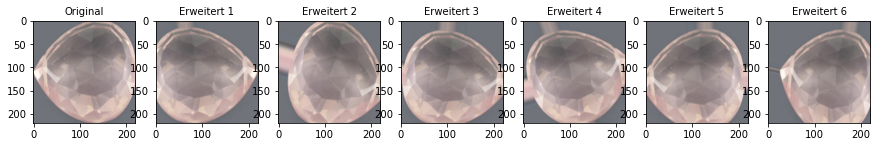

In [24]:
n = randint(0,len(X_train))
samples = np.expand_dims(X_train[n], 0)
it = train_datagen.flow(samples, batch_size=batch_size)
cols = 7

fig, ax = plt.subplots(nrows=1, ncols=cols, figsize=(15, 10))
ax[0].imshow(X_train[n], cmap='gray')
ax[0].set_title('Original', fontsize=10)

for i in range(1,cols):
    batch = it.next()
    image = batch[0].astype('uint32')
    ax[i].set_title('Erweitert {}'.format(i), fontsize=10)
    ax[i].imshow(image, cmap='gray')

In [25]:
#Erstellung der für die Modellinitierung notwendigen Datensets
train_gen = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_gen = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [26]:
#Ausgeben der Arrays
print(images.shape)
print(cropages.shape)
print(labels.shape)

(6618, 330, 330, 3)
(6618, 220, 220, 3)
(6618,)


### Modell initialisieren

In [28]:
#Modellinitierung
m = model.fit(
       train_gen,
       steps_per_epoch= iterations,
       epochs=epoch, 
       validation_data = val_gen,
       validation_steps = validations,
       verbose = 1
       )

Epoch 1/2
165/165 [==============================] - 217s 1s/step - loss: 2.3418 - accuracy: 0.3255 - val_loss: 2.0248 - val_accuracy: 0.4101
Epoch 2/2
165/165 [==============================] - 239s 1s/step - loss: 2.1027 - accuracy: 0.3875 - val_loss: 1.7024 - val_accuracy: 0.5183


## To do: Beschreibung der Erkenntnisse aus Trainings- und Validierungsgenauigkeit
### Ausgabe der Modellgenauigkeit und des Modellverlustes

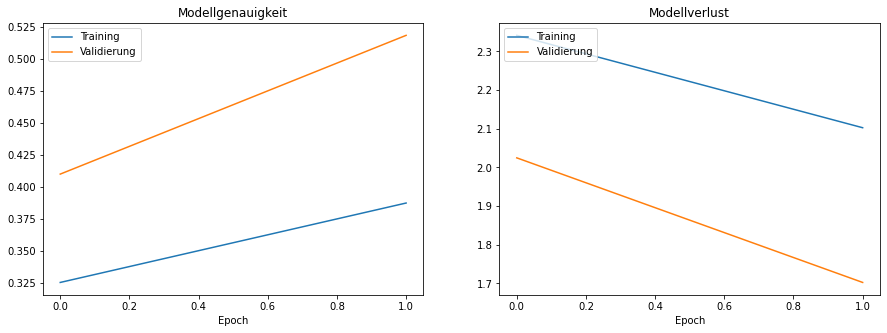

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].plot(m.history['accuracy'])
axs[0].plot(m.history['val_accuracy'])
axs[0].set_title('Modellgenauigkeit')
axs[0].legend(['Training', 'Validierung'], loc='upper left')

axs[1].plot(m.history['loss'])
axs[1].plot(m.history['val_loss'])
axs[1].set_title('Modellverlust')
axs[1].legend(['Training', 'Validierung'], loc='upper left')

for ax in axs.flat:
    ax.set(xlabel='Epoch')

<AxesSubplot:>

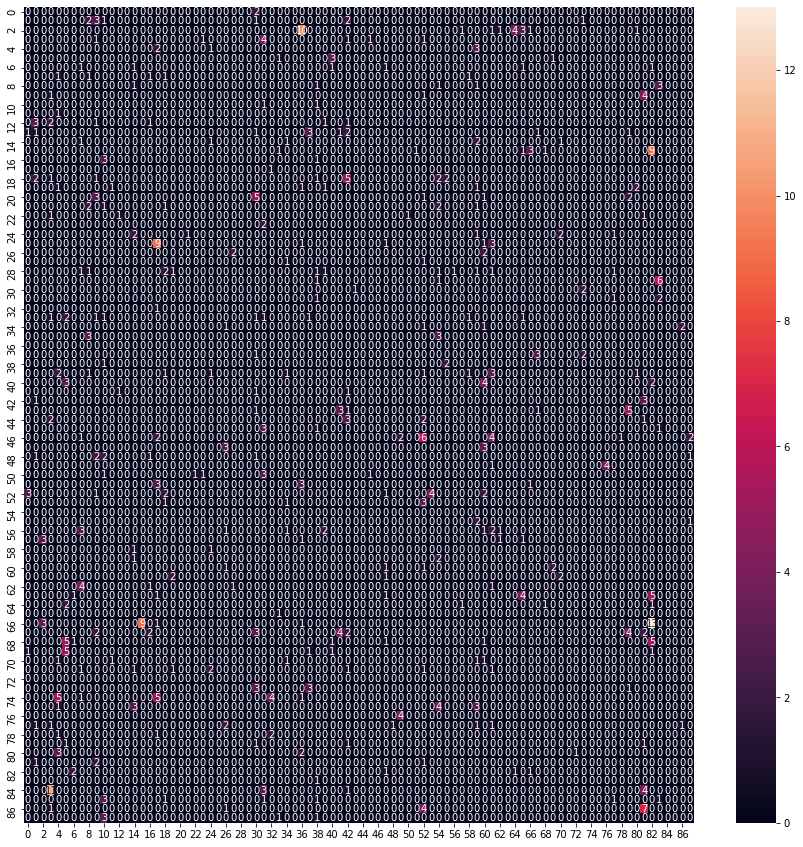

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

y_pre_test=model.predict(X_val)
#Ordnet jedem Bild einen Edelstein-Int-Wert zu (0 - 87)
y_pre_test=np.argmax(y_pre_test,axis=1)
cm=confusion_matrix(y_val,y_pre_test)

#Diagonale auf 0 setzen, um nur falsch klassifizierte darzustellen.
for i in range(len(names)):
    cm[i][i] = 0

plt.figure(figsize = (15,15))
sn.heatmap(cm, annot=True)

### Prüfen ob Werte korrekt vorhergesagt werden. Es werden nur falsch zugeordnete Bilder ausgewiesen.

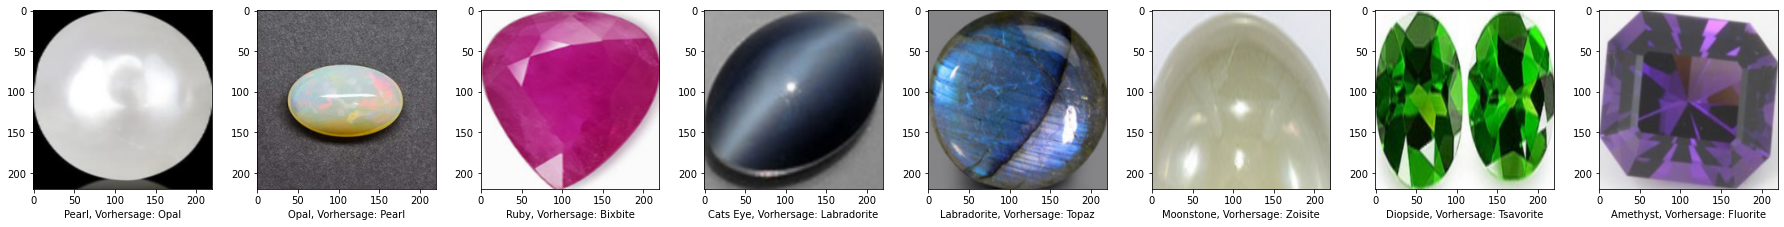

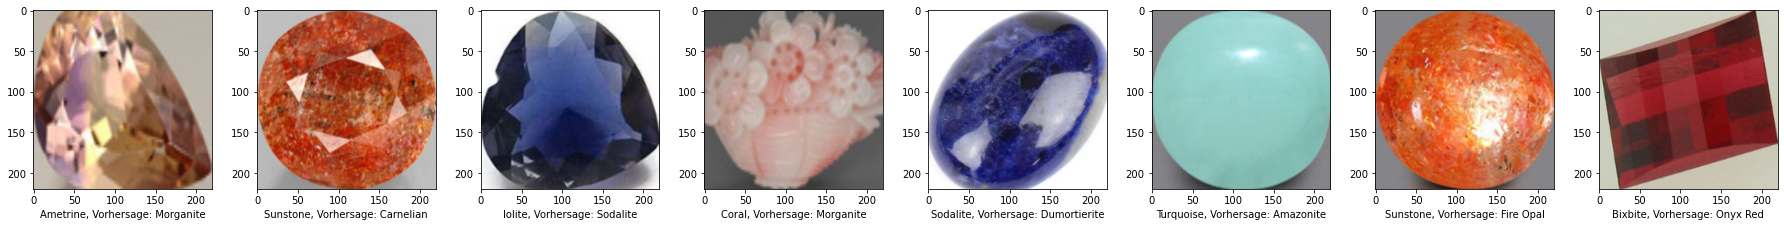

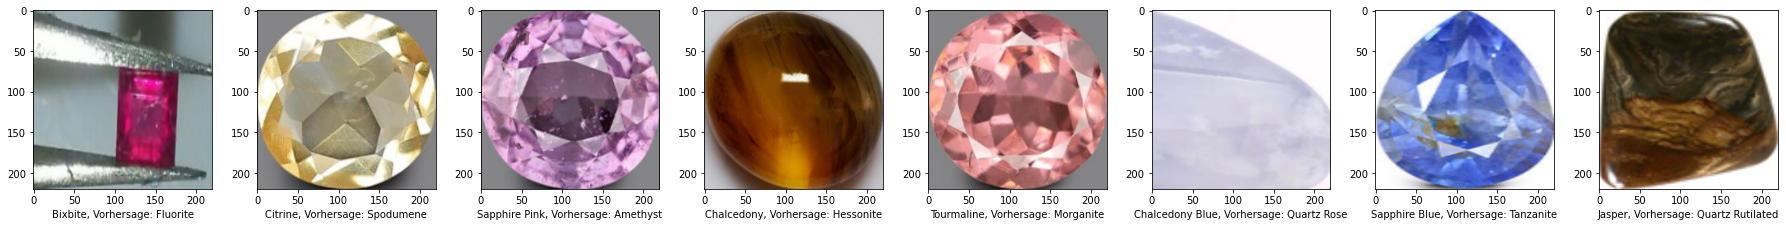

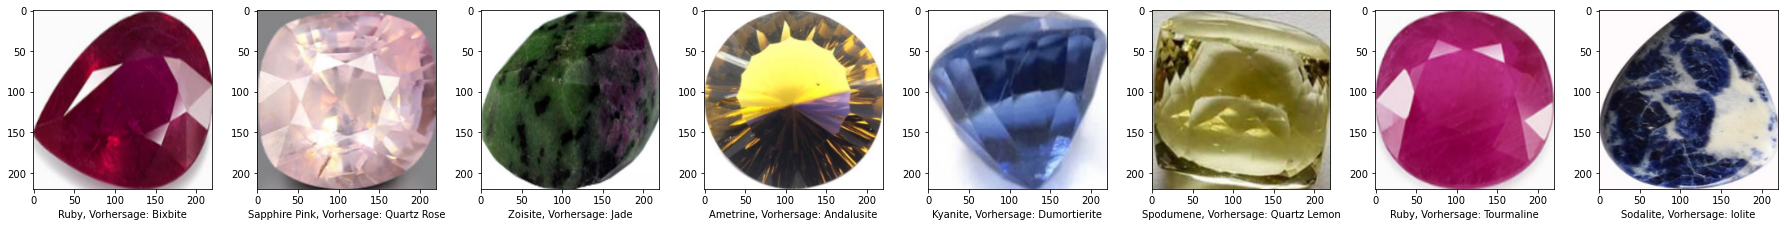

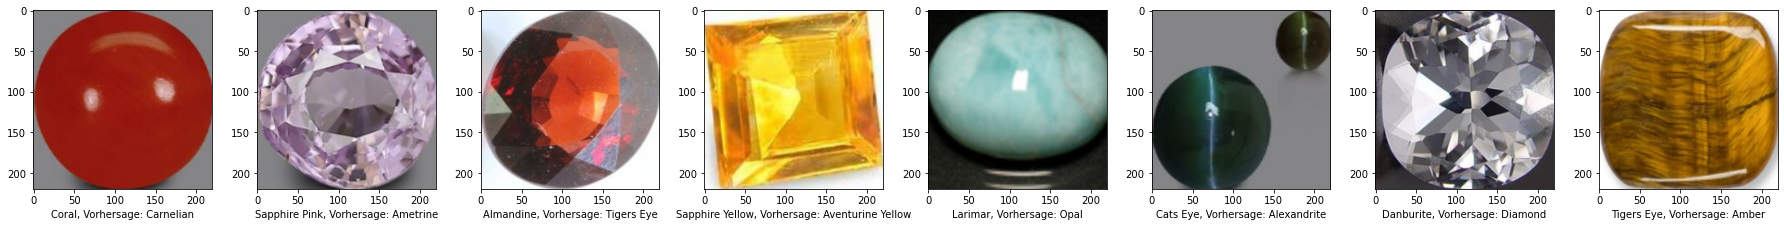

In [31]:
x=(y_pre_test-y_val!=0).tolist()
#Lösche alle korrekt klassifizierten Einträge
x=[i for i,l in enumerate(x) if l!=False]

figit = 0

for i in range (5):
    fig,ax=plt.subplots(1,8,figsize=(25,25))
    fig.tight_layout()
    
    for j in range(8):
        ax[j].imshow(X_val[x[figit]])
        ax[j].set_xlabel('{}, Vorhersage: {}'.format(names[y_val[x[figit]]],names[y_pre_test[x[figit]]]))
        figit += 1

### ähnliche Edelsteine suchen und ausgeben. Die eingebenen Edelsteinsorten wurden manuell ausgewählt.

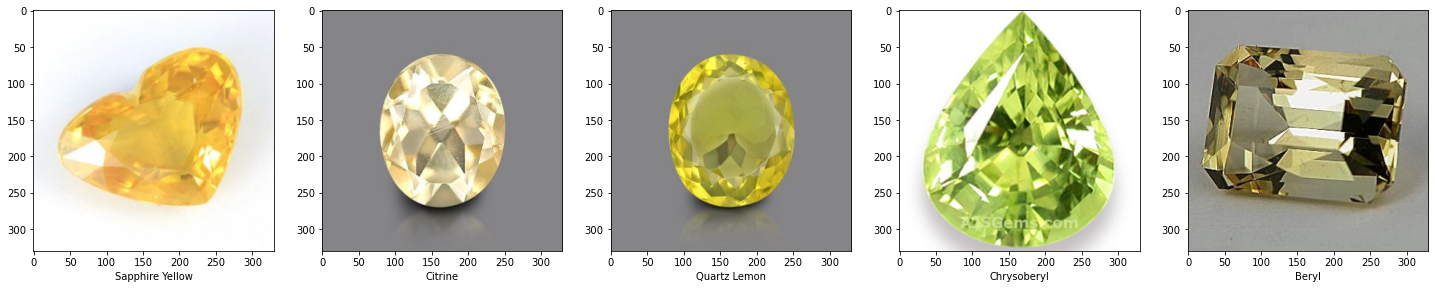

In [32]:
#Arry für ähliche Sorten
similar = ['Sapphire Yellow', 'Citrine', 'Quartz Lemon', 'Chrysoberyl', 'Beryl']

#Da wir die labels zu Integer umgewandelt haben, müssen wir dies für similar auch machen
rfinal = []
for i, n in enumerate(similar):
    for j, k in enumerate(names):
        if n == k:
            rfinal.append(j)
          
fig,ax=plt.subplots(1,len(similar),sharey=False,figsize=(25,25))

for i in range(len(similar)):
    #np.where alle Indices zurück für welche die Condition stimmt. Wir wählen den ersten und drucken das Bild
    ax[i].imshow(images[np.where(labels==rfinal[i])[0][1]])
    ax[i].set_xlabel(similar[i])

## Testing

## To do: Erkenntnisse aus Test Datensatz beschreiben

### Vorbereiten des Testdatensatzes für die Anwendung des trainierten Modelles

In [33]:
images, labels = [], []

for root, dirs, files in os.walk('dataset_final/test/'):
    tmp = os.path.basename(root)
    for file in files:
        labels.append(tmp)
        try:
            image = cv2.imread(root+'/'+file)
            image = cv2.resize(image,(int(img_w*1.5), int(img_h*1.5)))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            images.append(image)
        except Exception as e:
            print(e,file)
            
images = np.array(images)

for i, n in enumerate(labels):
    for j, k in enumerate(names):
        if n == k:
            labels[i] = j
labels = np.array(labels)

cropages = np.ndarray(shape=(len(images), img_w, img_h, 3), dtype=int)

counter = 0
for img in images: 
    try:
        edges = cv2.Canny(img, img_w, img_h)            
        #Wenn edges (11 oder mehr nonzeroes) gefunden wurden, crop image anhand min/max
        if(np.count_nonzero(edges)>11):           
            points = np.argwhere(edges>0)
            ymin,xmin = points.min(axis=0)
            ymax,xmax = points.max(axis=0)
            
            #Bild cropen und anschliessend auf Standardgrösse anpassen
            new_img = img[ymin:ymax, xmin:xmax]
            new_img = cv2.resize(new_img,(img_w, img_h))
        
        #Wenn keine edges gefunden wurden, Bild direkt an Standardgrösse anpassen
        else:
            new_img = cv2.resize(img,(img_w, img_h))
    
    #Im Falle eines Fehlers, Bild direkt an Standardgrösse anpassen
    except Exception as e:
        print(e)
        new_img = cv2.resize(img,(img_w, img_h))
    
    #cropages array mit neuen Bildern befüllen
    cropages[counter] = new_img
    counter += 1

### Anwendung des Testdatensatz auf das trainierte Modell. Zur Visualisierung wird das Bild angezeigt mit dem eigentlichen Label sowie dem zugewiesenen Label

IndexError: index 0 is out of bounds for axis 0 with size 0

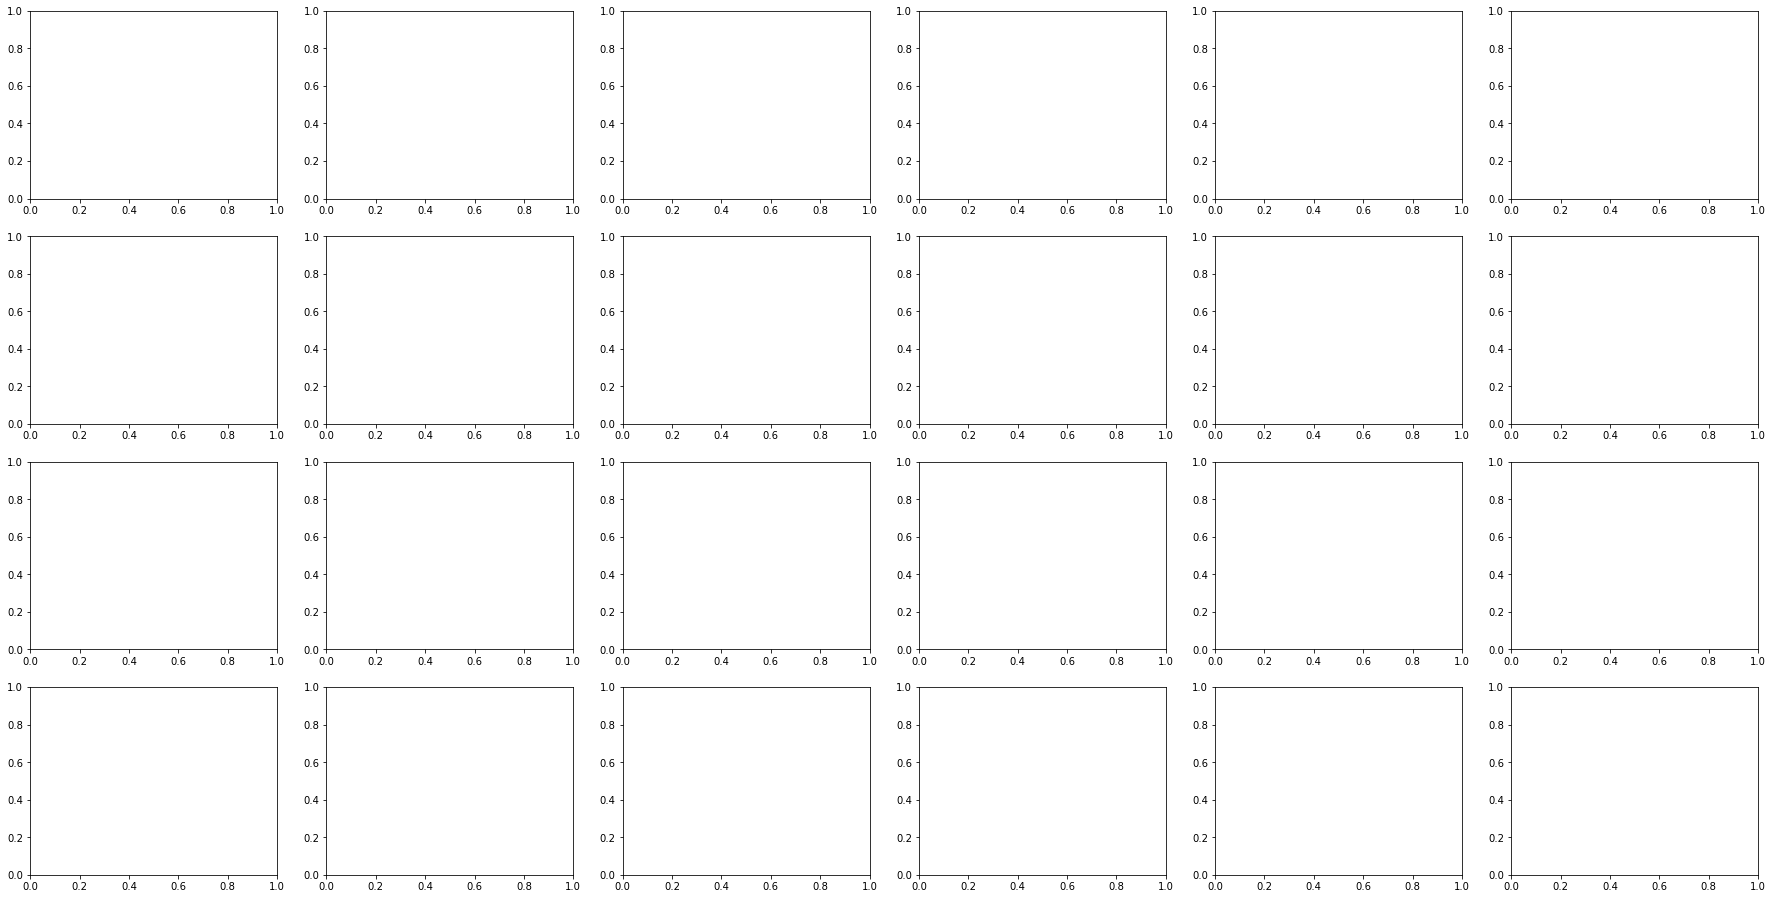

In [34]:
f,ax = plt.subplots(4,6)
f.subplots_adjust(0,0,4,3)
for i in range(4):
    for j in range(6):
        rnd = randint(0,len(cropages))
        pred_image = np.array([cropages[rnd]])
        pred_class = model.predict_classes(pred_image)[0]
        ax[i][j].imshow(cropages[rnd])
        ax[i][j].imshow(pred_image[0])
        if(names[pred_class] != names[labels[rnd]]):
            t = '{}, Vorhersage: {}'.format(names[labels[rnd]],names[pred_class])
            ax[i,j].set_title(t, fontdict={'color': 'darkred'})
        else:
            t = '{}, Vorhersage: {}'.format(names[labels[rnd]],names[pred_class]) 
            ax[i,j].set_title(t, fontdict={'color': 'green'})
        ax[i,j].axis('off')

## To do: Fazit /  Ethische Aspekte

### Beim Webscraping kann man sich oft die Frage stellen, wie es sich ethisch um die Datenbeschaffung verhält. 

### Bei der Sammlung von Onlinedaten ist besonders zu beachten, dass oft eine Fülle von Informationen ohne das Wissen der publizierenden Personen oder deren Zustimmung erhoben werden. 

### Da es sich in unserem Fall jedoch um nicht personenbezogene oder andere persönlich sensible Daten handelt und Webscraping weder explizit verboten (aber auch nicht erlaubt) ist, sehen wir uns keinen moralischen Bedenken ausgesetzt. 

### Hinzu kommt, dass die gescrapten Daten lediglich im Rahmen unseres Projektes und wissenschaftlich verwendet werden und damit nicht veröffentlicht werden. Damit sehen wir auch von der Problematik eventuell urheberrechtlich geschützter Bilder ab. 